In [1]:
from dataloader import load_data_one_hot_encoded
from trainer import train_model, evaluate_model
from snn import SNNModelSimple
import torch
import matplotlib.pyplot as plt
import pickle

In [3]:
root_folder = "./"
file_name = "final_merged_df_sw500.csv"

train_losses_beta = {}
train_accuracies_beta = {}
val_losses_beta = {}
val_accuracies_beta = {}
test_accuracies_beta = {}
for beta in [0.6, 0.7, 0.8, 0.9, 0.99, 0.999, 1]:
    print(f"Training for beta={beta}")
    train_loader, val_loader, test_loader, num_outputs, num_features = load_data_one_hot_encoded(root_folder, file_name, num_steps=100, batch_size=128)

    model = SNNModelSimple(num_features, num_outputs, beta=beta)
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

    train_losses, train_accuracies, val_losses, val_accuracies = train_model(model, train_loader, val_loader, optimizer, criterion, num_epochs=10)
    train_losses_beta[beta] = train_losses
    train_accuracies_beta[beta] = train_accuracies
    val_losses_beta[beta] = val_losses
    val_accuracies_beta[beta] = val_accuracies

    test_accuracies_beta[beta] = evaluate_model(model, test_loader, encoding="one-hot")

out_file_name = 'exp2_mse_beta_06_1_bs_128_ep_10_T_100.pkl' 
with open(out_file_name, 'wb') as f:
    pickle.dump({"train_losses": train_losses_beta, "train_accuracies": train_accuracies_beta, "val_losses": val_losses_beta, "val_accuracies": val_accuracies_beta, "test_accuracies": test_accuracies_beta}, f)


Training for beta=0.6
Epoch 1/10, Train Loss: 0.0712, Train Accuracy: 23.92%, Val Loss: 127.0855, Val Accuracy: 28.46%, Time: 93.32s
Epoch 2/10, Train Loss: 0.0672, Train Accuracy: 29.39%, Val Loss: 140.3498, Val Accuracy: 30.63%, Time: 92.64s
Epoch 3/10, Train Loss: 0.0664, Train Accuracy: 30.44%, Val Loss: 146.2480, Val Accuracy: 29.28%, Time: 90.54s
Epoch 4/10, Train Loss: 0.0660, Train Accuracy: 30.97%, Val Loss: 160.4721, Val Accuracy: 31.53%, Time: 95.30s
Epoch 5/10, Train Loss: 0.0656, Train Accuracy: 31.30%, Val Loss: 154.7598, Val Accuracy: 31.61%, Time: 91.81s
Epoch 6/10, Train Loss: 0.0654, Train Accuracy: 31.86%, Val Loss: 154.1680, Val Accuracy: 31.63%, Time: 90.27s
Epoch 7/10, Train Loss: 0.0652, Train Accuracy: 32.02%, Val Loss: 164.3494, Val Accuracy: 32.65%, Time: 90.72s
Epoch 8/10, Train Loss: 0.0650, Train Accuracy: 32.40%, Val Loss: 157.2361, Val Accuracy: 31.52%, Time: 91.63s
Epoch 9/10, Train Loss: 0.0649, Train Accuracy: 32.66%, Val Loss: 166.4316, Val Accuracy: 

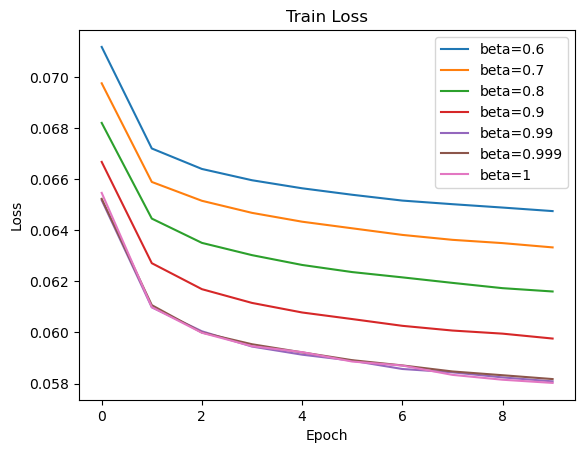

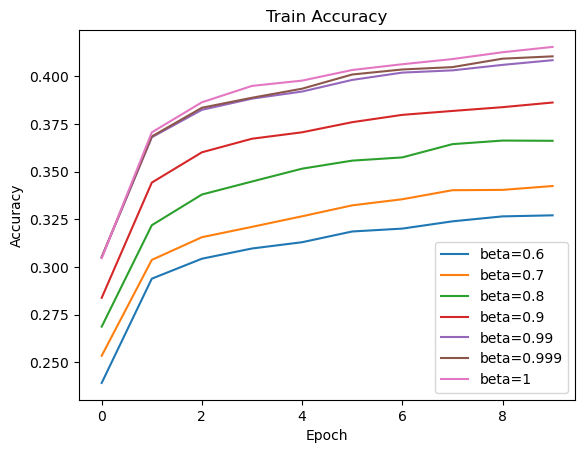

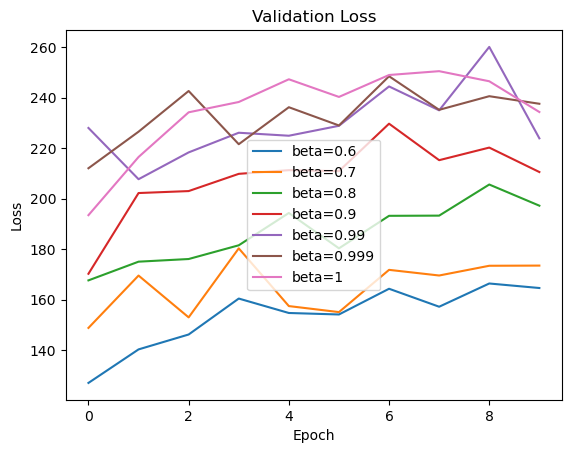

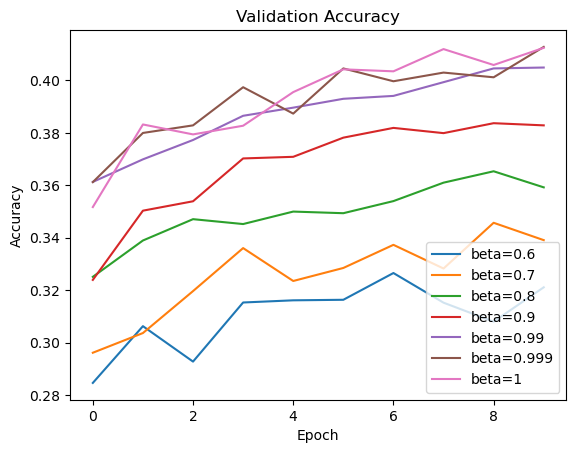

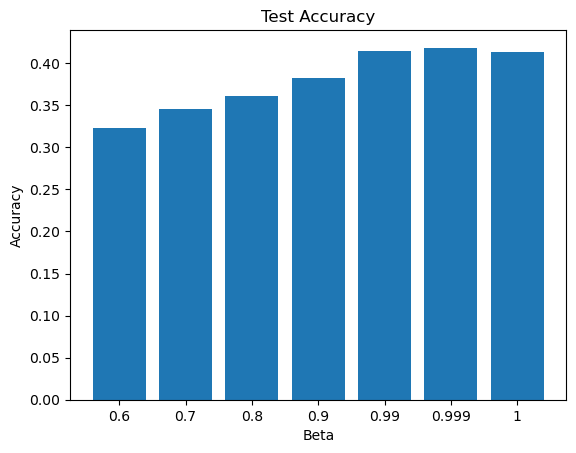

In [4]:
beta = [0.6, 0.7, 0.8, 0.9, 0.99, 0.999, 1]

plt.figure()
for b in beta:
    plt.plot(train_losses_beta[b], label=f"beta={b}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Train Loss")

plt.figure()
for b in beta:
    plt.plot(train_accuracies_beta[b], label=f"beta={b}")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Train Accuracy")

plt.figure()
for b in beta:
    plt.plot(val_losses_beta[b], label=f"beta={b}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Validation Loss")

plt.figure()
for b in beta:
    plt.plot(val_accuracies_beta[b], label=f"beta={b}")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Validation Accuracy")

plt.figure()
plt.bar([str(b) for b in beta], [test_accuracies_beta[b] for b in beta])
plt.xlabel("Beta")
plt.ylabel("Accuracy")
plt.title("Test Accuracy")

plt.show()